# Stacked Model Visualization

In [1]:
cd /project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization

/project/bioinformatics/DLLab/s169682/Code/AutismProject/Parallelization


In [2]:
import keras
import os
import pandas as pd
import numpy as np
import pickle as pkl

import gc

Using TensorFlow backend.


In [3]:
sDataPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/RegularizationIncluded/'

sDataPath=sDataPath+'LessLockingConfoundsIncluded'
sDataPath

'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/RegularizationIncluded/LessLockingConfoundsIncluded'

In [4]:
lsModels=[]
for i in range(50):
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    lsModels.append('Stack_'+sModelNum)



In [5]:
# %load IMPAC_FetchDLValidation.py
import os
import pandas as pd
import numpy as np
import pickle as pkl

lsModels=[]
for i in range(50):
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    lsModels.append('Stack_'+sModelNum)

pdSummaryData=pd.DataFrame(index=lsModels, columns=['Mean CV ROC', 'CV0 ROC', 'CV1 ROC', 'CV2 ROC'])

# Loop through all Cross Validation Results and re-save the mean ROC AUC
for i in range(50):

    # Get model number tag
    if i<10:
        sModelNum='0'+ str(i)
    else:
        sModelNum=str(i)
    
    # if the files exist, load the files into the pandas frame
    if os.path.isfile(sDataPath + '/Stack_' + sModelNum + 'CrossVal0ModelROCScore.p') and os.path.isfile(sDataPath + '/Stack_' + sModelNum + 'CrossVal1ModelROCScore.p') and os.path.isfile(sDataPath + '/Stack_' + sModelNum + 'CrossVal2ModelROCScore.p'):
        CV0=pkl.load(open((sDataPath + '/Stack_' + sModelNum + 'CrossVal0ModelROCScore.p'), 'rb'))
        CV1=pkl.load(open((sDataPath + '/Stack_' + sModelNum + 'CrossVal1ModelROCScore.p'), 'rb'))
        CV2=pkl.load(open((sDataPath + '/Stack_' + sModelNum + 'CrossVal2ModelROCScore.p'), 'rb'))

        CVMean=(CV0+CV1+CV2)/3.0
        
        pdSummaryData.loc['Stack_'+sModelNum, 'Mean CV ROC']=CVMean
        pdSummaryData.loc['Stack_'+sModelNum, 'CV0 ROC']=CV0
        pdSummaryData.loc['Stack_'+sModelNum, 'CV1 ROC']=CV1
        pdSummaryData.loc['Stack_'+sModelNum, 'CV2 ROC']=CV2
        
        pkl.dump(CVMean, open((sDataPath + '/Stack_' + sModelNum + 'MeanCVROCScore.p'), 'wb'))

# Walk through the directory and find the model with the highest ROC score
flMax = 0
sBest = 'run failed'

for root, dirs, files in os.walk(sDataPath):
    files.sort()

    for file in files:
        if file.endswith('MeanCVROCScore.p'):
            if os.path.isfile(os.path.join(sDataPath, file)):
                flMeanVal=pkl.load(open(os.path.join(sDataPath, file), 'rb'))
            if flMeanVal>flMax:
                flMax=flMeanVal
                sBest=file[0:7]

print('  ',sBest, ' ', flMax)


   Stack_4   0.7549661464740999


In [6]:
pdSummaryData

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_00,0.514656,0.49052,0.538362,0.515086
Stack_01,0.504744,0.49086,0.511587,0.511786
Stack_02,0.716317,0.698131,0.742644,0.708176
Stack_03,0.716861,0.705131,0.737343,0.708109
Stack_04,0.616098,0.607815,0.561196,0.679283
Stack_05,0.621469,0.670133,0.515528,0.678745
Stack_06,0.743536,0.738702,0.735372,0.756533
Stack_07,0.689251,0.66524,0.740673,0.66184
Stack_08,0.721795,0.708801,0.717023,0.739561
Stack_09,0.736909,0.751206,0.72912,0.730401


In [7]:
for sCol in pdSummaryData.columns:
    pdSummaryData[sCol] = pd.to_numeric(pdSummaryData[sCol]).fillna(0)

In [8]:
pdSummaryData.nlargest(5, 'Mean CV ROC')

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_42,0.754966,0.744275,0.746041,0.774582
Stack_06,0.743536,0.738702,0.735372,0.756533
Stack_16,0.741315,0.731295,0.735984,0.756668
Stack_15,0.739619,0.720217,0.742712,0.755927
Stack_09,0.736909,0.751206,0.729120,0.730401


In [9]:
dModelHistories={}
def fFetchModelHist(iModel):
    if iModel<10:
        sModel='Stack_0'+str(iModel)
    else:
        sModel='Stack_'+str(iModel)
    print('   '+sModel)
    dCVHist={}
    for iCV in range(3):
        if os.path.isfile(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p'))):
            ModelHist=pkl.load(open(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p')), 'rb'))
            if os.path.isfile(os.path.join(sDataPath, (sModel+'PreRetrainCrossVal'+str(iCV)+'ModelHistory.p'))):
                PreRetrainHist=pkl.load(open(os.path.join(sDataPath, (sModel+'CrossVal'+str(iCV)+'ModelHistory.p')), 'rb'))
                
                if not type(PreRetrainHist)==dict:
                    dCVHist[('PreRetrainCV'+str(iCV))]=PreRetrainHist.history
                else:
                    dCVHist[('PreRetrainCV'+str(iCV))]=PreRetrainHist
                        
            if not type(ModelHist)==dict:
                dCVHist[('CV'+str(iCV))]=ModelHist.history
            else:
                dCVHist[('CV'+str(iCV))]=ModelHist
            del(ModelHist)
        else:
            dCVHist[('CV'+str(iCV))]=0
    dModelHistories[sModel]=dCVHist
    del(dCVHist)
    gc.collect()
    return dModelHistories[sModel]

In [10]:
import matplotlib.pyplot as plt
def fPlot(iModel, sType, pdSummaryData, sBest):
    
    dCVHist=fFetchModelHist(iModel)
    
    if iModel<10:
        sModel='Stack_0'+str(iModel)
    else:
        sModel='Stack_'+str(iModel)
    
    plt.style.use('seaborn-white')
    
    plt.figure(1)
    plt.plot(range(len(dCVHist['CV0'][sType])), dCVHist['CV0'][sType],
             range(len(dCVHist['CV1'][sType])), dCVHist['CV1'][sType],
             range(len(dCVHist['CV2'][sType])), dCVHist['CV2'][sType]
            )
    plt.gca().set_prop_cycle(None)
    plt.plot(range(len(dCVHist['CV0']['val_'+sType])), dCVHist['CV0']['val_'+sType], '--', 
             range(len(dCVHist['CV1']['val_'+sType])), dCVHist['CV1']['val_'+sType], '--',
             range(len(dCVHist['CV2']['val_'+sType])), dCVHist['CV2']['val_'+sType], '--',
             solid_capstyle='round'
            )


    plt.legend(('Training Fold 1', 'Training Fold 2', 'Training Fold 3',
               'Validation Fold 1', 'Validation Fold 3', 'Validation Fold 3'),
               loc='center left', bbox_to_anchor=(1,0.5)
              )
    
    flTestPerformance = pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/'+sModel+'FullModelROCScore.p', 'rb'))
        
    plt.title('Training ' + sType + ' for Architecture Number ' + sModel
              +'\n ' + sBest
              +'\n Mean Cross Validation Performance: ' + str(pdSummaryData.loc[sModel, 'Mean CV ROC'])
             +'\n Test Performance: ' + str(flTestPerformance))
    plt.xlabel('Epoch')
    plt.grid(False)
    plt.ylabel('Accuracy')
    
    if dCVHist.__contains__("PreRetrainCV0"):
        plt.figure(2)
        plt.plot(range(len(dCVHist['PreRetrainCV0'][sType])), dCVHist['PreRetrainCV0'][sType],
                 range(len(dCVHist['PreRetrainCV1'][sType])), dCVHist['PreRetrainCV1'][sType],
                 range(len(dCVHist['PreRetrainCV2'][sType])), dCVHist['PreRetrainCV2'][sType]
                )
        plt.gca().set_prop_cycle(None)
        plt.plot(range(len(dCVHist['PreRetrainCV0']['val_'+sType])), dCVHist['PreRetrainCV0']['val_'+sType], '--', 
                 range(len(dCVHist['PreRetrainCV1']['val_'+sType])), dCVHist['PreRetrainCV1']['val_'+sType], '--',
                 range(len(dCVHist['PreRetrainCV2']['val_'+sType])), dCVHist['PreRetrainCV2']['val_'+sType], '--',
                 solid_capstyle='round'
                )


        plt.legend(('Training Fold 1', 'Training Fold 2', 'Training Fold 3',
                   'Validation Fold 1', 'Validation Fold 3', 'Validation Fold 3'),
                   loc='center left', bbox_to_anchor=(1,0.5)
                  )

        flTestPerformance = pkl.load(open('/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/Stacked/'+sModel+'FullModelROCScore.p', 'rb'))

        plt.title('PreRetrain Training ' + sType + ' for Architecture Number ' + sModel
                  +'\n ' + sBest
                  +'\n Mean Cross Validation Performance: ' + str(pdSummaryData.loc[sModel, 'Mean CV ROC'])
                 +'\n Test Performance: ' + str(flTestPerformance))
        plt.xlabel('Epoch')
        plt.grid(False)
        plt.ylabel('Accuracy')
    
    plt.show()
    plt.close()

plt.show()

In [11]:
# import keras as ker
# import tensorflow as tf
# tf.reset_default_graph()
# ker.backend.clear_session()
# del ker
# del tf

In [12]:
# dCVAllHist={}
# # for i in range(50):
# #     dCVAllHist[i]=fFetchModelHist(i)
# dCVAllHist[25]=fFetchModelHist(25)
# dCVAllHist[43]=fFetchModelHist(43)


In [13]:
# print('asjsjs')

In [14]:
# dCVAllHist={}
# for i in range(50):
#     dCVAllHist[i]=fFetchModelHist(i)



In [15]:
#dCVAllHist[25]

In [16]:
pdSummaryData.nlargest(5, 'Mean CV ROC')

,Mean CV ROC,CV0 ROC,CV1 ROC,CV2 ROC
Stack_42,0.754966,0.744275,0.746041,0.774582
Stack_06,0.743536,0.738702,0.735372,0.756533
Stack_16,0.741315,0.731295,0.735984,0.756668
Stack_15,0.739619,0.720217,0.742712,0.755927
Stack_09,0.736909,0.751206,0.729120,0.730401


   Stack_42


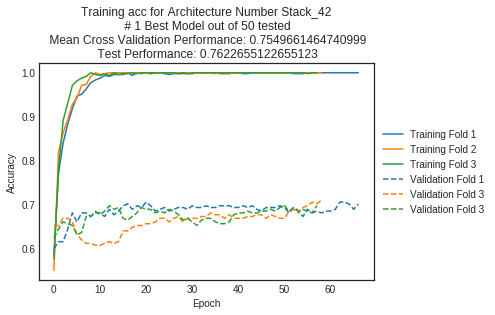

   Stack_43


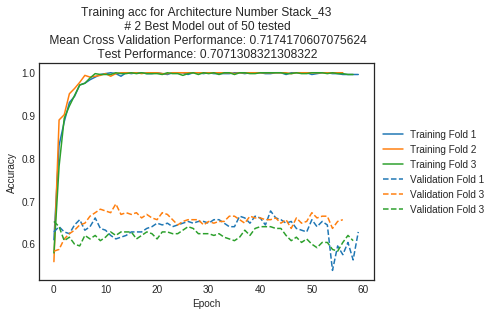

   Stack_15


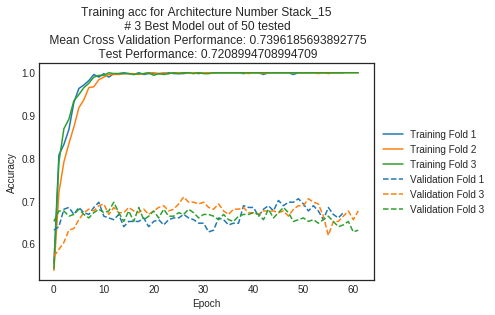

   Stack_46


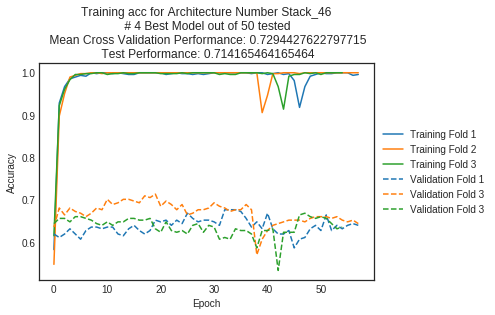

   Stack_33


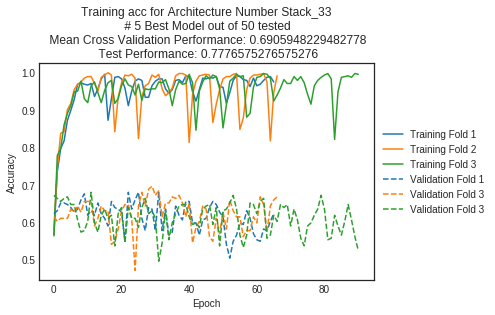

In [17]:
lsModels=[42,43,15,46,33]
sType='acc'
i=0
for iModel in lsModels:
    i=i+1
    sBest = '# ' + str(i) + ' Best Model out of 50 tested'
    fPlot(iModel, sType, pdSummaryData, sBest)
